### Lowpass linear-phase filters
- The ideal lowpass linear-phase filter:

Frequency of the ideal lowpass filter with generalized linea-phase is given by:
$$ H_{lp}(e^{j\omega}) = \left\{ \begin{array}[cc]
                                ;e^{-j\omega M/2} , & |\omega| < \omega_c, \\
                  0, & \omega_c < |\omega| < \pi.
                \end{array}
                \right.$$
The corresponding impulse response i found by evaluating the integral
$$ h_{lp}[n] = \frac{1}{2\pi} \int_{-\omega_c}^{\omega_c}e^{-j\omega M/2} e^{j\omega n}d \omega =
\frac{1}{2\pi} \int_{-\omega_c}^{\omega_c}e^{j\omega (n- M/2)}d \omega = \frac{e^{j\omega_c (n- M/2)} - e^{-j\omega_c (n- M/2)}}{2\pi j(n-M/2)} 
= \frac{\sin\omega_c(n-M/2)}{\pi(n-M/2)}, \quad -\infty < n < \infty.$$

- Causal lowpass linear-phase filter:

A causal lowpass linear-phase filter is obtained from windowing the ideal lowpass linear-phase filter, $h_{lp}[n]$, using a symmetric window as follows:
$$ h[n] = \frac{\sin\omega_c(n-M/2)}{\pi(n-M/2)}\cdot w[n].$$


In [14]:
import numpy as np
from scipy import signal
from scipy import special as sps
import matplotlib.pyplot  as plt

np.seterr(divide='ignore', invalid='ignore');

delta1 = .01;
delta2 = .001;
delta = min(delta1,delta2);
wp = .4*np.pi
ws = .6*np.pi
wc = (ws + wp)/2;

dw = abs(ws - wp);
A = -20*np.log10(delta);
M = np.ceil((A - 8)/(2.285*dw))
# M = M + 1
n = np.arange(M+1)
alpha = M/2;

37.0
38
38


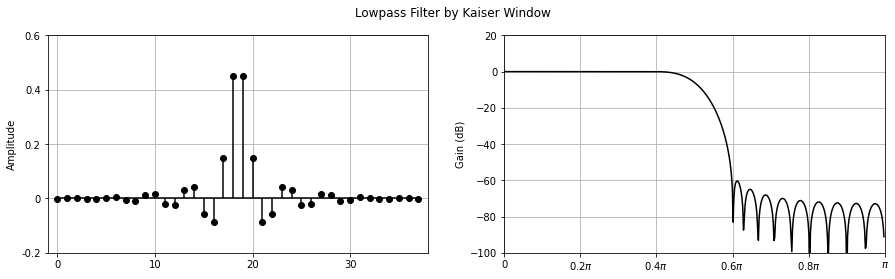

In [15]:
# The ideal lowpass filter:
hi_lp = np.sin(wc*(n-alpha))/(np.pi*(n - alpha))

hi_lp[np.isnan(hi_lp)] = wc/np.pi; # wc/pi is the limit when 'n - alpha' --> 0
hi = hi_lp

# Building the Kaiser Window:

## Input parameters for the Kaiser window:
if A > 50:
    beta = .1102*(A - 8.7)
elif A < 21:
    beta = 0.
else:
    beta = .5842*(A - 21)**(.4) + .07886*(A - 21)

# Calling the modified Bessel funtions of the first kind:
# Win = np.abs(np.real(sps.iv(0, beta*(1 - ((n - alpha)/alpha)**2)**(1/2))/sps.iv(0,beta)))
# Win = sps.iv(0, beta*(1 - ((n - alpha)/alpha)**2)**(1/2))/sps.iv(0,beta)
Win = np.kaiser(M+1, beta)

# Windowing the ideal filter:
h = hi*Win


# Design using firwin():
# h = signal.firwin(M+1, 0.5, window=('kaiser', beta))

w, H = signal.freqz(h,1,worN=512)
# w, H = signal.freqz(Win,1,worN=512)
# H = H/np.max(np.abs(H))

print(M)
print(len(Win))
print(len(h))

# fig1, axs = plt.subplots(1,2, sharex= False,figsize=(10,4),constrained_layout=True)
fig1, axs = plt.subplots(1,2, sharex= False,figsize=(15,4))
fig1.suptitle('Lowpass Filter by Kaiser Window')

markerline, stemlines, baseline  = axs[0].stem(h, markerfmt='ko')
markerline.set_markerfacecolor('k')
stemlines.set_color('k')
baseline.set_color('k')
axs[0].set_ylabel('Amplitude')
axs[0].set_ylim([-.2, .6])
axs[0].set_yticks([-0.2, 0, 0.2, 0.4, 0.6])
axs[0].set_yticklabels([-0.2, 0, 0.2, 0.4, 0.6])
axs[0].set_xlim([-1, len(h)])
axs[0].set_xticks([0, 10, 20, 30])
axs[0].grid(True)

axs[1].plot(w,20*np.log10(abs(H)),'k')
axs[1].set_ylabel('Gain (dB)')
axs[1].set_ylim([-100, 20])
axs[1].grid(True)
axs[1].set_xlim([0, np.pi])
axs[1].set_xticks([0, 2*np.pi/10, 4*np.pi/10, 6*np.pi/10, 8*np.pi/10, np.pi])
axs[1].set_xticklabels([0, r'$0.2\pi$', r'$0.4\pi$', r'$0.6\pi$',r'$0.8\pi$', r'$\pi$']);

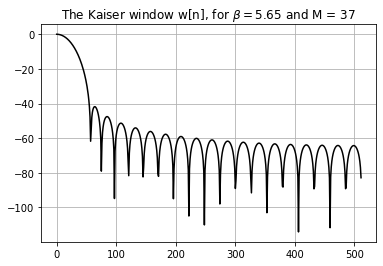

In [16]:
# FFT of the Kaiser window:
w, H = signal.freqz(Win,1,worN=512)
H = H/np.max(np.abs(H))
plt.plot(20*np.log10(abs(H)),'k')
# plt.plot(20*np.log10(abs(H/(np.max(np.abs(H))))),'k')
plt.grid()
plt.title('The Kaiser window w[n], for ' + r'$\beta = $' + str(round(beta,2)) + ' and ' + 'M = ' + str(int(M)));